In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

# WGMS

## 1. GLACIER
General (and presumably static) information about each glacier

In [2]:
glacier = pd.read_csv("data/wgms/glacier.csv")

glacier_nz = glacier[glacier["POLITICAL_UNIT"] == "NZ"]

glacier_nz_drop = glacier_nz.drop(["POLITICAL_UNIT", "REMARKS", "GLACIER_REGION_CODE", "GLACIER_SUBREGION_CODE",
                                  "GEN_LOCATION", "SPEC_LOCATION", "PARENT_GLACIER",
                                  "PRIM_CLASSIFIC", "FORM", "FRONTAL_CHARS", "EXPOS_ACC_AREA", "EXPOS_ABL_AREA"], axis=1)
glacier_nz_drop.head()

C:\Users\Zach\AppData\Local\Temp\ipykernel_1516\3864064715.py:1: DtypeWarning: Columns (3,4,10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  glacier = pd.read_csv("data/wgms/glacier.csv")


,NAME,WGMS_ID,LATITUDE,LONGITUDE
158448,ABEL,1546,-43.320000,170.630005
158449,ADAMS,2923,-43.320000,170.720001
158450,AILSA,2924,-44.786100,168.187000
158451,ALMER/SALISBURY,1548,-43.470001,170.220001
158452,ANDY,1590,-44.430000,168.369995


In [3]:
glacier_nz_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2869 entries, 158448 to 161316
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NAME       2869 non-null   object 
 1   WGMS_ID    2869 non-null   int64  
 2   LATITUDE   2869 non-null   float64
 3   LONGITUDE  2869 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 112.1+ KB


## 2. CHANGE
Change in glacier thickness, area, and/or volume – typically from geodetic surveys



In [4]:
change = pd.read_csv("data/wgms/change.csv")

change_nz = change[change["POLITICAL_UNIT"] == "NZ"]

change_nz_drop = change_nz.drop(["POLITICAL_UNIT",
                                 "NAME",
                                 "SURVEY_ID",
                                 "SURVEY_DATE",
                                 "REFERENCE_DATE",
                                 "LOWER_BOUND",
                                 "UPPER_BOUND",
                                 "AREA_CHANGE",  # all NaN
                                 "AREA_CHANGE_UNC",
                                 "AREA_SURVEY_YEAR",
                                 "THICKNESS_CHG_UNC",
                                 "VOLUME_CHANGE_UNC",
                                 "SD_PLATFORM_METHOD",
                                 "RD_PLATFORM_METHOD",
                                 "INVESTIGATOR",
                                 "SPONS_AGENCY",
                                 "REFERENCE",
                                 "REMARKS"], axis=1)
change_nz_drop.rename(columns = {'YEAR':'CHANGE_YEAR'}, inplace = True)
change_nz_drop.head()

,WGMS_ID,CHANGE_YEAR,THICKNESS_CHG,VOLUME_CHANGE
814867,2923,2013,5913.0,NaN
814868,2923,2018,-14433.0,NaN
814869,2923,2018,-13184.0,NaN
814870,2923,2014,-7845.0,NaN
814871,2923,2017,-7478.0,NaN


In [5]:
change_nz_drop["CHANGE_YEAR"].value_counts()

CHANGE_YEAR
2017    6998
2015    6584
2014    6162
2016    5848
2019    5516
2012    3764
2013    3107
2009    2853
2004    2758
2018     940
2011     720
2010     393
Name: count, dtype: int64

In [6]:
change_nz_drop[change_nz_drop['CHANGE_YEAR'] == 2009]["WGMS_ID"].nunique()

2767

In [7]:
change_nz_drop[change_nz_drop['CHANGE_YEAR'] == 2019]["WGMS_ID"].nunique()

2758

In [8]:
# front_variation = pd.read_csv("data/wgms/front_variation.csv")

# front_variation_nz = front_variation[front_variation["POLITICAL_UNIT"] == "NZ"]

# front_variation_nz_drop = front_variation_nz.drop(["FRONT_VAR_UNC", 
#                                                    "SURVEY_PLATFORM_METHOD", 
#                                                    "INVESTIGATOR", 
#                                                    "SPONS_AGENCY", 
#                                                    "REFERENCE", 
#                                                    "REMARKS",
#                                                    "POLITICAL_UNIT",
#                                                    "NAME"], axis=1)
# front_variation_nz_drop.rename(columns = {'YEAR':'FRONT_VARIATION_YEAR'}, inplace = True)
# front_variation_nz_drop.head()

In [9]:
# tmp = front_variation_nz_drop[front_variation_nz_drop["QUALITATIVE_VARIATION"] == "ST"]
# tmp["WGMS_ID"].nunique()

In [10]:
# mass_balance = pd.read_csv("data/wgms/mass_balance.csv")

# mass_balance_nz = mass_balance[mass_balance["POLITICAL_UNIT"] == "NZ"]

# mass_balance_nz_drop = mass_balance_nz.drop(["LOWER_BOUND", 
#                                              "UPPER_BOUND", 
#                                              "WINTER_BALANCE_UNC", 
#                                              "SUMMER_BALANCE_UNC", 
#                                              "ANNUAL_BALANCE_UNC",
#                                              "REMARKS",
#                                              "POLITICAL_UNIT",
#                                              "NAME"], axis=1)
# mass_balance_nz_drop.rename(columns = {'YEAR':'MASS_BALANCE_YEAR', 'AREA':'MASS_BALANCE_YEAR_AREA'}, inplace = True)
# mass_balance_nz_drop.head()

In [11]:
# special_event = pd.read_csv("data/wgms/special_event.csv")

# special_event_nz = special_event[special_event["POLITICAL_UNIT"] == "NZ"]

# special_event_nz_drop = special_event_nz.drop(["INVESTIGATOR", 
#                                                "SPONS_AGENCY", 
#                                                "REFERENCE", 
#                                                "REMARKS",
#                                                "POLITICAL_UNIT",
#                                                "NAME",
#                                                "EVENT_ID"], axis=1)
# special_event_nz_drop.head()

In [12]:
# reconstruction_front_variation = pd.read_csv("data/wgms/reconstruction_front_variation.csv")

# reconstruction_front_variation_nz = reconstruction_front_variation[reconstruction_front_variation["POLITICAL_UNIT"] == "NZ"]

# reconstruction_front_variation_nz_drop = reconstruction_front_variation_nz.drop(["YEAR_UNC", 
#                                                                                  "REF_YEAR_UNC", 
#                                                                                  "FRONT_VAR_POS_UNC", 
#                                                                                  "FRONT_VAR_NEG_UNC",
#                                                                                  "ELEVATION_UNC", 
#                                                                                  "METHOD_CODE", 
#                                                                                  "METHOD_REMARKS", 
#                                                                                  "REMARKS", 
#                                                                                  "QUALITATIVE_VARIATION",  # all NaN
#                                                                                  "LOWEST_ELEVATION", 
#                                                                                  "HIGHEST_ELEVATION",
#                                                                                  "MORAINE_DEFINED_MAX",
#                                                                                  "POLITICAL_UNIT",
#                                                                                  "NAME"], axis=1)
# reconstruction_front_variation_nz_drop.rename(columns = {'YEAR':'RECONSTRUCTION_FRONT_VARIATION_YEAR'}, inplace = True)
# reconstruction_front_variation_nz_drop.head()

## 3. Merge WGMS
change and glacier

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
merge_1 = pd.merge(change_nz_drop, glacier_nz_drop, how="left", on="WGMS_ID")
merge_1.head()

,WGMS_ID,CHANGE_YEAR,THICKNESS_CHG,VOLUME_CHANGE,NAME,LATITUDE,LONGITUDE
0,2923,2013,5913.0,NaN,ADAMS,-43.32,170.720001
1,2923,2018,-14433.0,NaN,ADAMS,-43.32,170.720001
2,2923,2018,-13184.0,NaN,ADAMS,-43.32,170.720001
3,2923,2014,-7845.0,NaN,ADAMS,-43.32,170.720001
4,2923,2017,-7478.0,NaN,ADAMS,-43.32,170.720001


In [15]:
merge_1.rename(columns={'THICKNESS_CHG': 'THICKNESS_CHANGE'}, inplace=True)

In [17]:
gdf_wgms = (
    gpd.GeoDataFrame(
        merge_1, geometry=gpd.points_from_xy(merge_1.LONGITUDE, merge_1.LATITUDE), crs="EPSG:4326"
    )
)

gdf_wgms.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 45643 entries, 0 to 45642
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   WGMS_ID           45643 non-null  int64   
 1   CHANGE_YEAR       45643 non-null  int64   
 2   THICKNESS_CHANGE  45643 non-null  float64 
 3   VOLUME_CHANGE     13790 non-null  float64 
 4   NAME              45643 non-null  object  
 5   LATITUDE          45643 non-null  float64 
 6   LONGITUDE         45643 non-null  float64 
 7   geometry          45643 non-null  geometry
dtypes: float64(4), geometry(1), int64(2), object(1)
memory usage: 2.8+ MB


In [18]:
gdf_wgms_2009 = gdf_wgms[gdf_wgms["CHANGE_YEAR"] == 2009]
len(gdf_wgms_2009)

2853

In [19]:
gdf_wgms_2016 = gdf_wgms[gdf_wgms["CHANGE_YEAR"] == 2016]
len(gdf_wgms_2016)

5848

In [20]:
gdf_wgms_2019 = gdf_wgms[gdf_wgms["CHANGE_YEAR"] == 2019]
len(gdf_wgms_2019)

5516

In [21]:
gdf_wgms_2009.to_file("data_cleaned\gdf_wgms_2009.gpkg")
gdf_wgms_2016.to_file("data_cleaned\gdf_wgms_2016.gpkg")
gdf_wgms_2019.to_file("data_cleaned\gdf_wgms_2019.gpkg")

# GLIMS

In [22]:
gla_glims = gpd.read_file('data/glims/nz_glaciers_polygons.shp')

In [23]:
gla_glims.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9032 entries, 0 to 9031
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   line_type   9032 non-null   object  
 1   anlys_id    9032 non-null   float64 
 2   glac_id     9032 non-null   object  
 3   anlys_time  9032 non-null   object  
 4   area        9032 non-null   float64 
 5   db_area     9032 non-null   float64 
 6   width       9032 non-null   float64 
 7   length      9032 non-null   float64 
 8   primeclass  9032 non-null   float64 
 9   min_elev    9032 non-null   float64 
 10  mean_elev   9032 non-null   float64 
 11  max_elev    9032 non-null   float64 
 12  src_date    9032 non-null   object  
 13  rec_status  9032 non-null   object  
 14  glac_name   9032 non-null   object  
 15  wgms_id     9032 non-null   object  
 16  local_id    9032 non-null   object  
 17  glac_stat   9032 non-null   object  
 18  gone_date   9032 non-null   object  
 19

In [24]:
gla_glims["src_date"].value_counts()

src_date
2019-03-28T00:00:00    4077
2016-03-11T00:00:00    3950
2009-02-17T22:38:29     604
1600-09-09T00:00:00     401
Name: count, dtype: int64

In [25]:
columns_to_drop = [
    'wgms_id', 'local_id', 'glac_stat', 'gone_date', 'gone_dt_e',
    'subm_id', 'rc_id', 'chief_affl', 'conn_lvl', 'surge_type',
    'term_type', 'gtng_o1reg', 'gtng_o2reg', 'rgi_gl_typ', 'loc_unc_x',
    'loc_unc_y', 'glob_unc_x', 'glob_unc_y', 'submitters', 'analysts',
    'mean_elev', 'max_elev', 'width', 'length', 'primeclass',
    'rec_status', 'proc_desc',
    'anlys_id', 'anlys_time', 'glac_name', 'release_dt', 'geog_area',
    'line_type', 'area', 'db_area'
]
gla_glims_cleaned = gla_glims.drop(columns=columns_to_drop)
gla_glims_cleaned

,glac_id,min_elev,src_date,geometry
0,G170910E43118S,0.0,1600-09-09T00:00:00,"POLYGON Z ((170.91298 -43.11761 0.00000, 170.9..."
1,G172719E42080S,0.0,1600-09-09T00:00:00,"POLYGON Z ((172.72521 -42.07704 0.00000, 172.7..."
2,G169791E43889S,0.0,1600-09-09T00:00:00,"POLYGON Z ((169.78505 -43.88165 0.00000, 169.7..."
3,G168618E44432S,0.0,1600-09-09T00:00:00,"POLYGON Z ((168.62173 -44.43379 0.00000, 168.6..."
4,G170012E43673S,0.0,2009-02-17T22:38:29,"POLYGON Z ((170.00462 -43.66741 0.00000, 170.0..."
...,...,...,...,...
9027,G171135E43078S,0.0,1600-09-09T00:00:00,"POLYGON Z ((171.13377 -43.07421 0.00000, 171.1..."
9028,G170930E43172S,0.0,1600-09-09T00:00:00,"POLYGON Z ((170.93579 -43.18184 0.00000, 170.9..."
9029,G169768E43774S,0.0,1600-09-09T00:00:00,"POLYGON Z ((169.75320 -43.77087 0.00000, 169.7..."
9030,G168427E44498S,0.0,1600-09-09T00:00:00,"POLYGON Z ((168.43220 -44.49552 0.00000, 168.4..."


In [26]:
gla_glims_cleaned['min_elev'].value_counts()

min_elev
0.0       5082
799.0      107
594.0       36
1080.0      29
917.0       25
          ... 
1672.0       1
1405.0       1
1269.0       1
1712.0       1
2203.0       1
Name: count, Length: 1051, dtype: int64

In [27]:
gla_glims_cleaned['year'] = gla_glims_cleaned['src_date'].str[:4].astype(int)

In [29]:
# gla_glims_cleaned.explore()

In [30]:
gla_glims_cleaned_2009 = gla_glims_cleaned[gla_glims_cleaned['year'] == 2009].drop('year', axis=1)
len(gla_glims_cleaned_2009)

604

<Axes: >

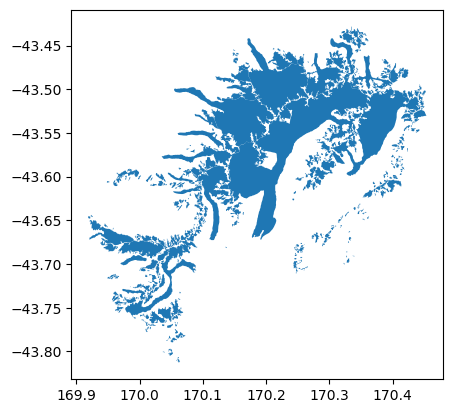

In [36]:
gla_glims_cleaned_2009.plot()

In [31]:
gla_glims_cleaned_2016 = gla_glims_cleaned[gla_glims_cleaned['year'] == 2016].drop('year', axis=1)
len(gla_glims_cleaned_2016)

3950

<Axes: >

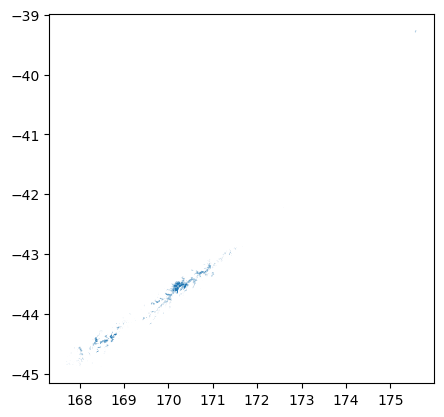

In [37]:
gla_glims_cleaned_2016.plot()

In [32]:
gla_glims_cleaned_2019 = gla_glims_cleaned[gla_glims_cleaned['year'] == 2019].drop('year', axis=1)
len(gla_glims_cleaned_2019)

4077

<Axes: >

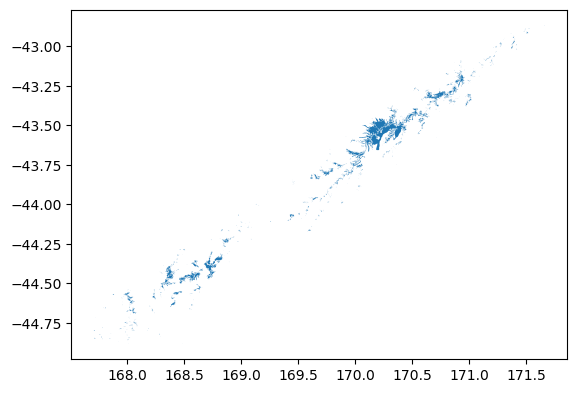

In [38]:
gla_glims_cleaned_2019.plot()

# Spatial Join

In [44]:
gdf_wgms_2019.crs == gla_glims_cleaned_2019.crs

True

In [39]:
glims_wgms_2009 = gpd.sjoin(gla_glims_cleaned_2009, gdf_wgms_2009).drop("index_right", axis=1).reset_index()
glims_wgms_2009.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   index             224 non-null    int64   
 1   glac_id           224 non-null    object  
 2   min_elev          224 non-null    float64 
 3   src_date          224 non-null    object  
 4   geometry          224 non-null    geometry
 5   WGMS_ID           224 non-null    int64   
 6   CHANGE_YEAR       224 non-null    int64   
 7   THICKNESS_CHANGE  224 non-null    float64 
 8   VOLUME_CHANGE     214 non-null    float64 
 9   NAME              224 non-null    object  
 10  LATITUDE          224 non-null    float64 
 11  LONGITUDE         224 non-null    float64 
dtypes: float64(5), geometry(1), int64(3), object(3)
memory usage: 21.1+ KB


<Axes: >

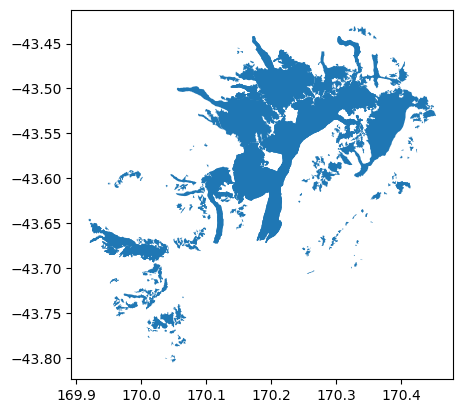

In [40]:
glims_wgms_2009.plot()

In [41]:
glims_wgms_2016 = gpd.sjoin(gla_glims_cleaned_2016, gdf_wgms_2016).drop("index_right", axis=1).reset_index()
glims_wgms_2016.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   index             4981 non-null   int64   
 1   glac_id           4981 non-null   object  
 2   min_elev          4981 non-null   float64 
 3   src_date          4981 non-null   object  
 4   geometry          4981 non-null   geometry
 5   WGMS_ID           4981 non-null   int64   
 6   CHANGE_YEAR       4981 non-null   int64   
 7   THICKNESS_CHANGE  4981 non-null   float64 
 8   VOLUME_CHANGE     0 non-null      float64 
 9   NAME              4981 non-null   object  
 10  LATITUDE          4981 non-null   float64 
 11  LONGITUDE         4981 non-null   float64 
dtypes: float64(5), geometry(1), int64(3), object(3)
memory usage: 467.1+ KB


<Axes: >

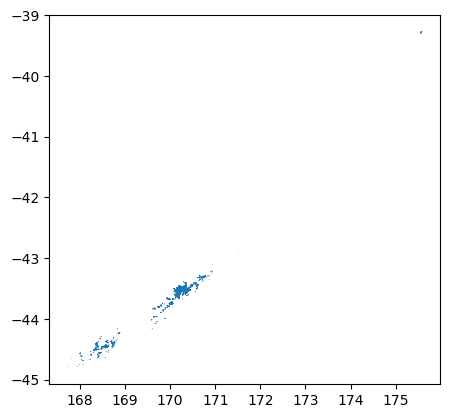

In [42]:
glims_wgms_2016.plot()

In [43]:
glims_wgms_2019 = gpd.sjoin(gla_glims_cleaned_2019, gdf_wgms_2019).drop("index_right", axis=1).reset_index()
glims_wgms_2019.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   index             1350 non-null   int64   
 1   glac_id           1350 non-null   object  
 2   min_elev          1350 non-null   float64 
 3   src_date          1350 non-null   object  
 4   geometry          1350 non-null   geometry
 5   WGMS_ID           1350 non-null   int64   
 6   CHANGE_YEAR       1350 non-null   int64   
 7   THICKNESS_CHANGE  1350 non-null   float64 
 8   VOLUME_CHANGE     1350 non-null   float64 
 9   NAME              1350 non-null   object  
 10  LATITUDE          1350 non-null   float64 
 11  LONGITUDE         1350 non-null   float64 
dtypes: float64(5), geometry(1), int64(3), object(3)
memory usage: 126.7+ KB


<Axes: >

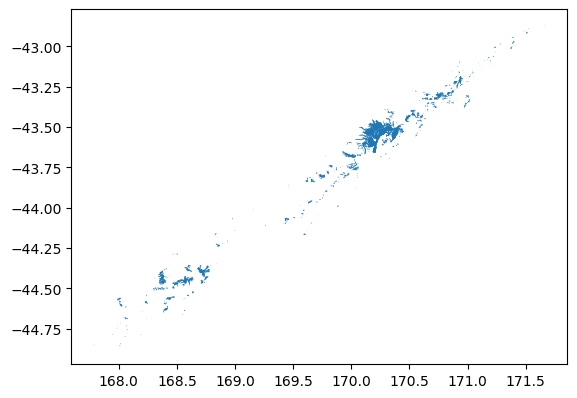

In [44]:
glims_wgms_2019.plot()

In [53]:
# export
glims_wgms_2009.to_file("data_cleaned\glims_wgms_2009.gpkg")
glims_wgms_2016.to_file("data_cleaned\glims_wgms_2016.gpkg")
glims_wgms_2019.to_file("data_cleaned\glims_wgms_2019.gpkg")

In [58]:
# glims_wgms_2019.explore()